<a href="https://colab.research.google.com/github/stephendambo/Dambolin9/blob/Master/Group3_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

Dataset Loading

In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
df = pd.read_csv('/content/drive/MyDrive/Project_Data/train.csv')

Dataset Top 5 Rows & Colunms

In [15]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Dataset Bottom 5 Rows & Colunms

In [16]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


#Exploratory Analysis

Dataset Rows And Columns Count

In [17]:
df.shape

(2000, 21)

Dataset Information

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Duplicate Count

In [19]:
duplicate_value = len(df[df.duplicated()])
print('Number of duplicated value:', duplicate_value)

Number of duplicated value: 0


Statistical Information of Dataset

In [20]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#Dataset Visualization

Price Range

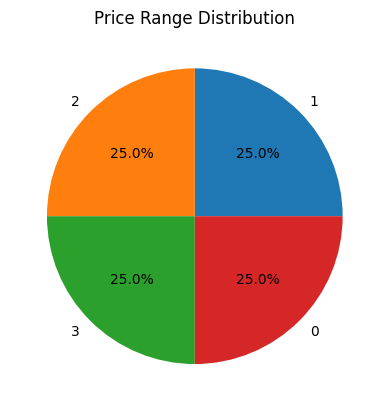

In [21]:
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

Relationship Between Battery Power And Price Range

<Axes: xlabel='price_range', ylabel='battery_power'>

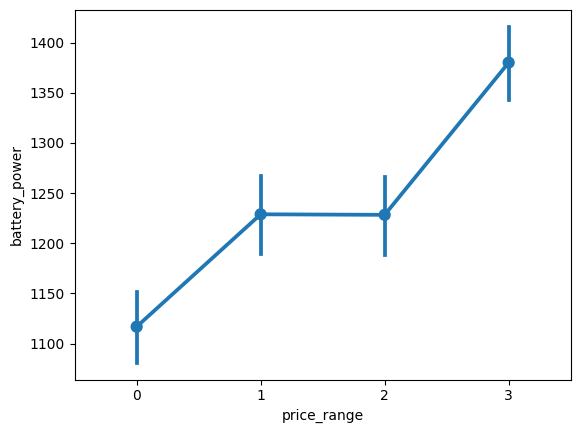

In [22]:
sns.pointplot(y = 'battery_power', x = 'price_range', data=df)

Relationship Between Internal Memory And Price Range

<Axes: xlabel='price_range', ylabel='int_memory'>

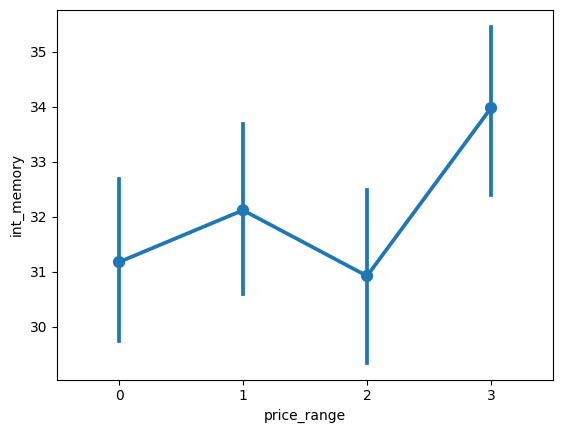

In [23]:
sns.pointplot(y = 'int_memory', x = 'price_range', data=df)

Plotting Relationship Between Price Range And Ram

<Axes: xlabel='price_range', ylabel='ram'>

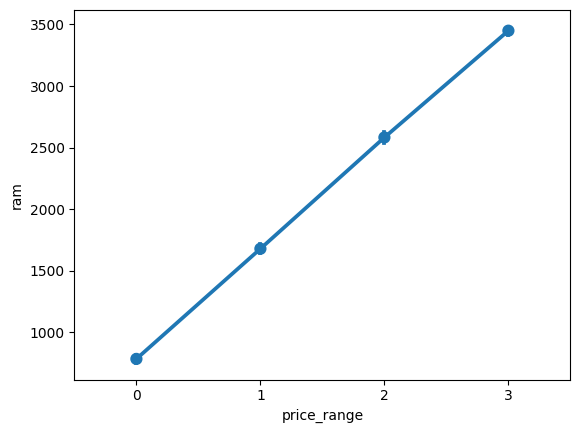

In [24]:
sns.pointplot(y = 'ram', x = 'price_range', data=df)

With or without bluetooth vs price range

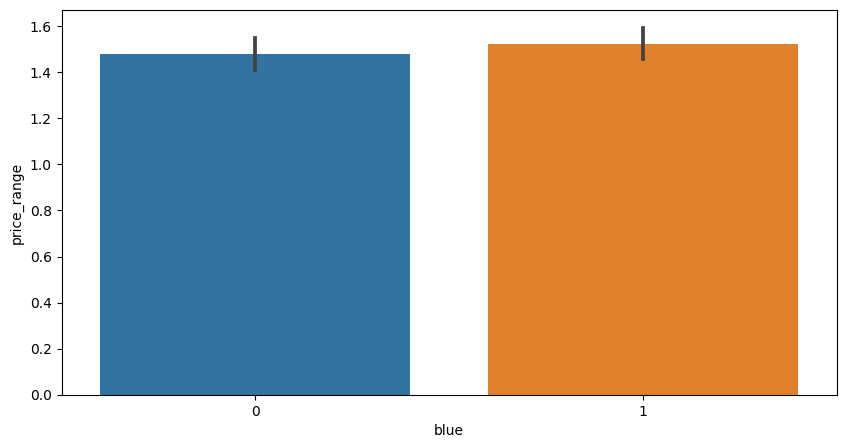

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax)
plt.show()

Bluetooth vs Price Range

<Axes: xlabel='price_range', ylabel='blue'>

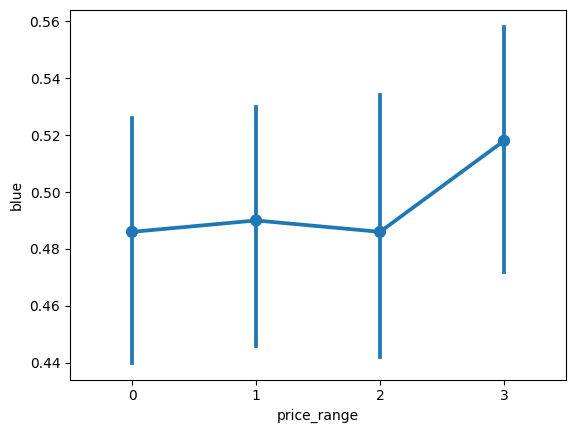

In [26]:
sns.pointplot(y = 'blue', x = 'price_range', data=df)

Primary Camera Pixies vs Price Range

<Axes: xlabel='price_range', ylabel='pc'>

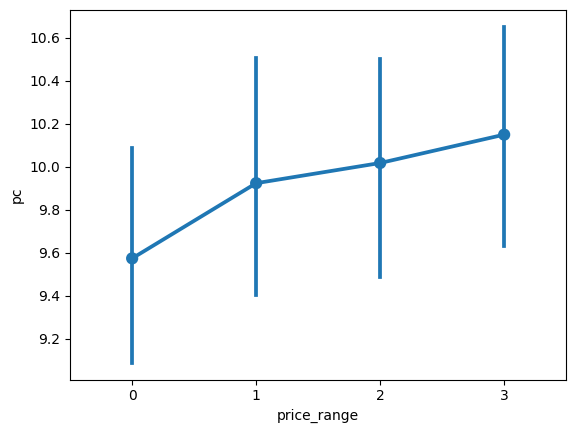

In [27]:
sns.pointplot(y = 'pc', x = 'price_range', data=df)

Front Camera vs Price Range

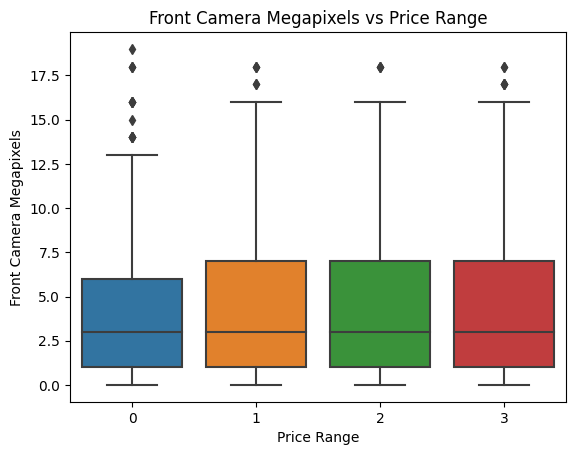

In [28]:
sns.boxplot(x='price_range', y='fc', data=df)
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')
plt.show()

Touch screen Vs Price Range

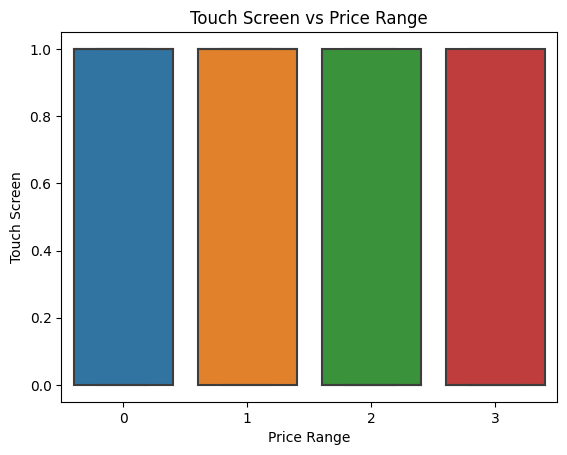

In [29]:
sns.boxplot(x='price_range', y='touch_screen', data=df)
plt.xlabel('Price Range')
plt.ylabel('Touch Screen')
plt.title('Touch Screen vs Price Range')
plt.show()

3G vs Price Range

<Axes: xlabel='price_range', ylabel='three_g'>

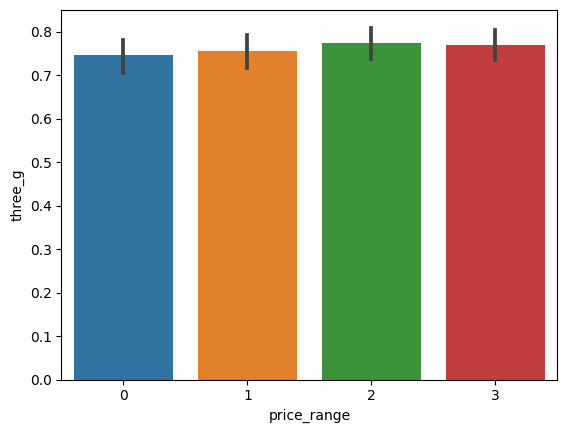

In [30]:
sns.barplot(x='price_range', y='three_g', data=df)

4G vs Price Range

<Axes: xlabel='price_range', ylabel='four_g'>

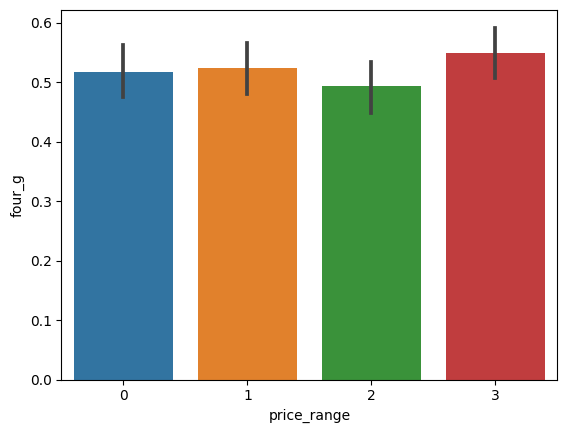

In [31]:
sns.barplot(x='price_range', y='four_g', data=df)

Wifi Availability vs Price Range

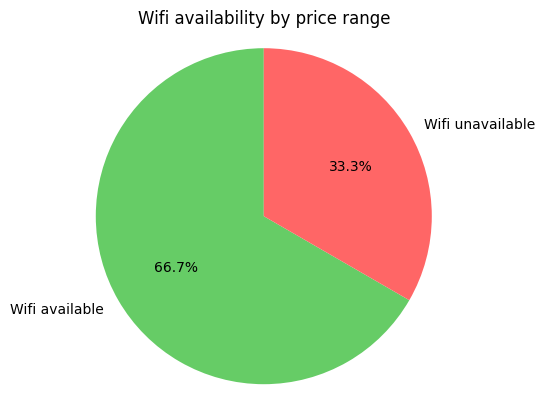

In [32]:
price_ranges = {
    'low': (0,50),
    'medium': (51,100),
    'high': (101,200),
    'premium': (201, float('inf')),

}
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

wifi_counts = {
    'available': 0,
    'unavailable': 0,
}
for price_range, wifi_available in wifi_availabilities.items():
    if wifi_available:
      wifi_counts['available'] += 1
    else:
        wifi_counts['unavailable'] += 1

        labels = ['Wifi available', 'Wifi unavailable']
        sizes = [wifi_counts['available'], wifi_counts['unavailable']]
        colors = ['#66cc66', '#ff6666']
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')
        plt.title('Wifi availability by price range')
        plt.show()


#Correlation Heatmap

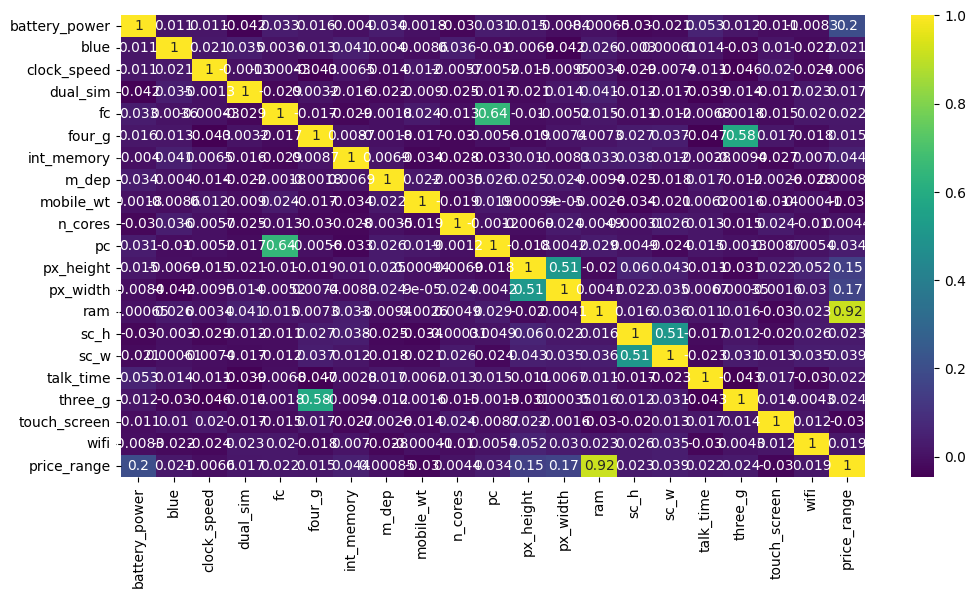

In [33]:
correlation = df.corr()
plt.figure(figsize=[12,6])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize':10})
plt.show()

#Hypothesis Testing
1. Null hypothesis: All categories of phone are distributed with equal price range
2. Alternative hypothesis: All categories of phone are not distributed with equal price range

In [34]:
from ipywidgets.widgets.widget_upload import observe
import pandas as pd
from scipy import stats #Perform Statistical test to obtain p-value
observed_freq = df['price_range'].value_counts().values #Calculated observed frequency distribution
total = len(df)
expected_freq = [total/4]*4 #Calculatee expected frequency distribution
chi2, p = stats.chisquare(observed_freq, f_exp=expected_freq) #Perform chi-square goodness-of-fit test
print(f'Chi-square statistics: {chi2}, p-value: {p}') #Print results

Chi-square statistics: 0.0, p-value: 1.0


#Feature Enginnering And Data-Preprocessing

Checking And Handling Outliers

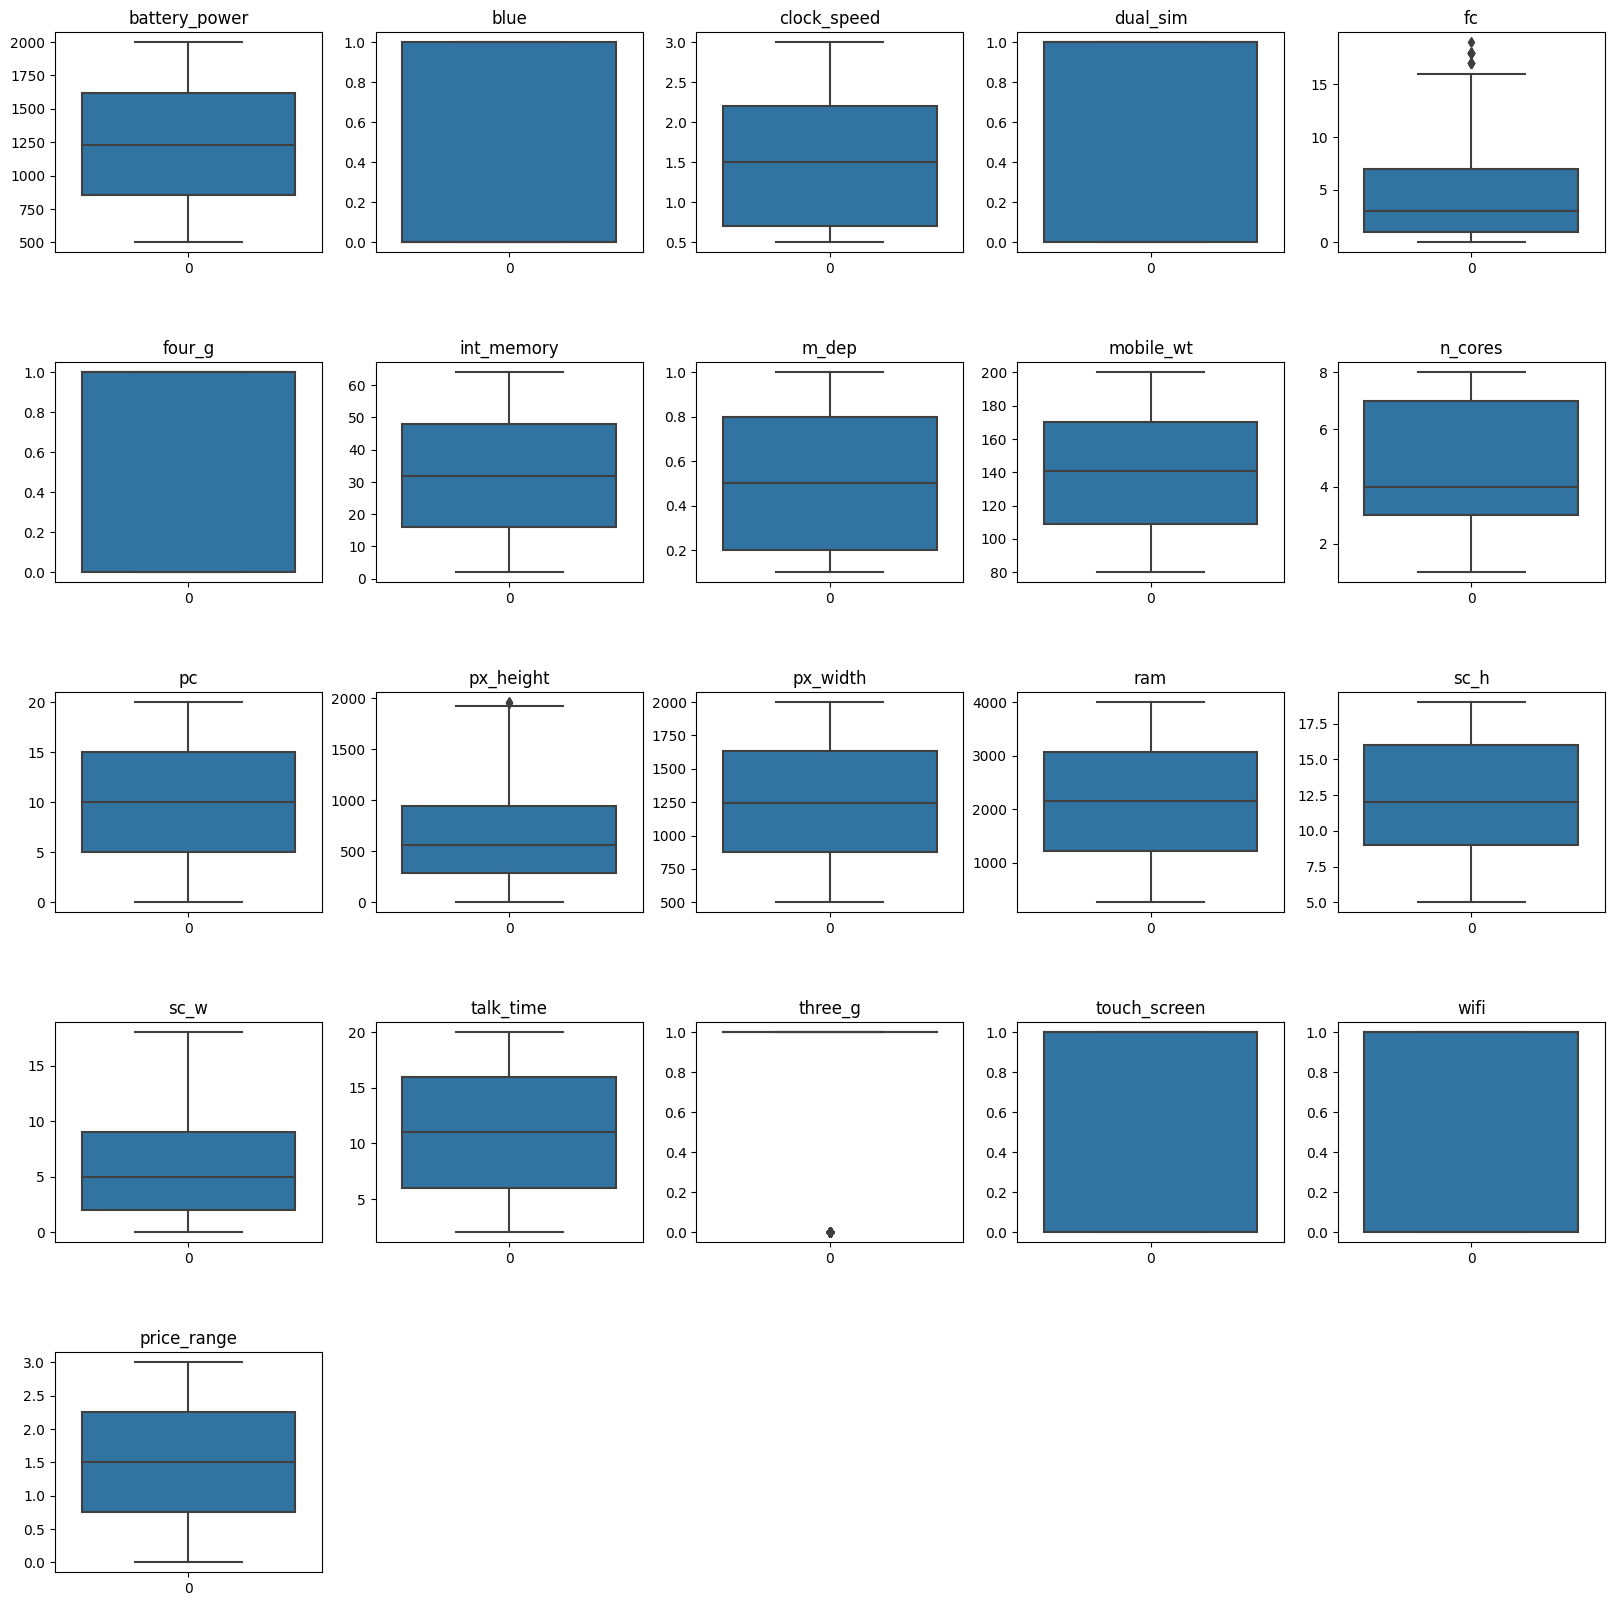

In [35]:
plt.figure(figsize=(20,20))
for index, item in enumerate([i for i in df.describe().columns.to_list()]):
  plt.subplot(5,5, index+1)
  sns.boxplot(df[item])
  plt.title(item)
  plt.subplots_adjust(hspace=0.5)
  print("\n")

#Categorical Encoding

Categorical encoding is not necessary because all values are in integer and float

#Data Preprocess

In [36]:
x = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [37]:
x.shape

(2000, 20)

In [38]:
y.shape

(2000,)

#Data Splitting
Splitting dataset into train and test sets

In [39]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# ML Model Implementation
Applying logistic regression

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_train)
y_pred

array([1.38071388, 2.47606359, 0.63219811, ..., 1.78717726, 2.5588267 ,
       1.05192162])

#KNN (K Nearest Neighbor)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [43]:
knn = KNeighborsClassifier (n_neighbors=3)
knn.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.score(X_train, y_train)

0.96

In [45]:
predictions = knn.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9275

Plotting graph to visualize model accuracy using confusion matrix

In [47]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,   4,   0,   0],
       [  3,  85,   3,   0],
       [  0,   7,  81,   4],
       [  0,   0,   8, 104]])

Text(58.222222222222214, 0.5, 'Truth')

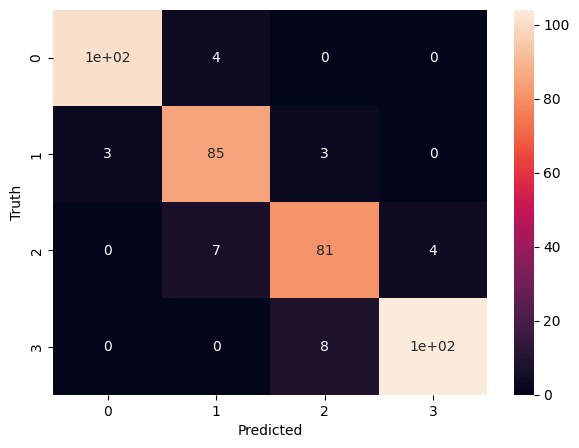

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel ('Truth')

#Predicting Values for test.csv

In [49]:
test_df = pd.read_csv('/content/drive/MyDrive/Project_Data/test.csv')
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [50]:
test_df.shape

(1000, 21)

In [51]:
test_df = test_df.drop(['id'], axis = 1)
test_df.shape

(1000, 20)

In [52]:
test_pred = knn.predict(test_df)

In [53]:
test_df['predicted_price']= test_pred

In [54]:
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


<Axes: xlabel='predicted_price', ylabel='battery_power'>

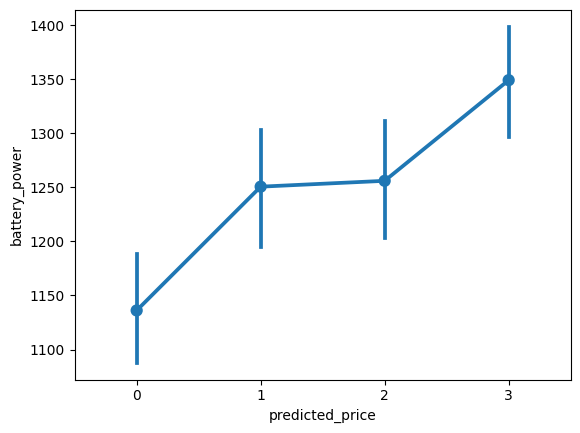

In [56]:
sns.pointplot(y = 'battery_power', x = 'predicted_price', data=test_df)

<Axes: xlabel='predicted_price', ylabel='ram'>

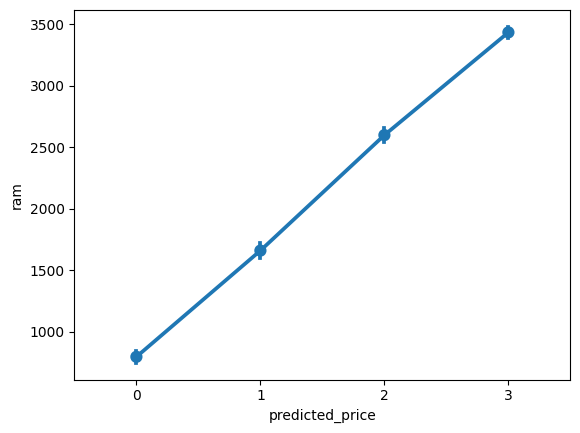

In [57]:
sns.pointplot(y = 'ram', x = 'predicted_price', data=test_df)

#Conclusion

Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four diferent price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices have bluetooth while the other half do not. Futhermore, we noticed that as the price range increases, there is a gradual increase in battery power and RAM shows continuous growth from low cost to high cost phones.

Our analysis suggests that RAM and battery power are the most significant factors affecting the price range of mobile phones.

From our analysis, we concluded that logistic regression and knn yielded the best results in predicting the price range of mobile phones.

Finally, We can conclude that certain features on a phone are neccessary for a price range. We can also reduce non-essential features of a phone to save resources.

DATA ATTRIBUTES
In this data;
id:ID
battery_power: Total energy a battery can store measured in mAh
blue: Has bleutooth or not
clock_speed: Speed at which microprocessor executes instructions
dual_sim: Has duel sim support or not
fc: Front camera mega pixels
four_g: Has 4G or not
int_memory: Internal memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight Of Mobile Phone
n_cores: Number Of cores Of Processor
pc: Primary Camera Mega Pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Weight
ram: Ramdom Access Memory in Megabytes
sc_h: Screen Height Of Mobile in cm
sc_w: Screen Width Of Mobile in cm
talk_time: Longest time that a single battery charge will last
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not



